In [1]:
#Download the datasets in the second format (32x32) from http://ufldl.stanford.edu/housenumbers/

import matplotlib.pyplot as plt
import numpy as np, random

#Read the datasets into memory
from scipy.io import loadmat

train = loadmat('train_32x32.mat')
test = loadmat('test_32x32.mat')

In [2]:
train_img, train_lbs = train['X'], train['y']
test_img, test_lbs = test['X'], test['y']

train_img.shape, train_lbs.shape, test_img.shape, test_lbs.shape

((32, 32, 3, 73257), (73257, 1), (32, 32, 3, 26032), (26032, 1))

In [3]:
#Divide training and validation
#validation set size = 5% of training set
validation_percentage = 0.05
validation_size = int(validation_percentage * train_img.shape[3])
#select a random sample from the training set
random.seed(0)
sample = random.sample(range(train_img.shape[3]), validation_size)
validation_img = train_img[:,:,:,sample]
train_img = np.delete(train_img, sample, 3)
validation_lbs = train_lbs[sample,:]
train_lbs = np.delete(train_lbs, sample, 0)
train_img.shape, validation_img.shape, train_lbs.shape, validation_lbs.shape

((32, 32, 3, 69595), (32, 32, 3, 3662), (69595, 1), (3662, 1))

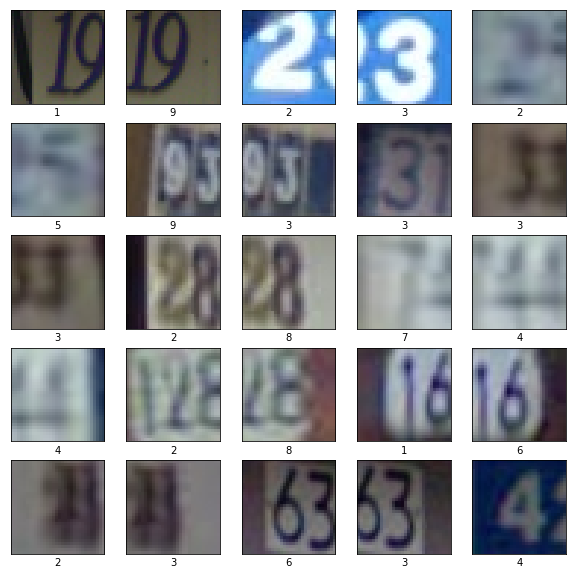

In [5]:
#Check if the training set is divided correctely and print the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_img[:,:,:,i], cmap=plt.cm.binary)
    # The labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_lbs[i][0])
plt.show()

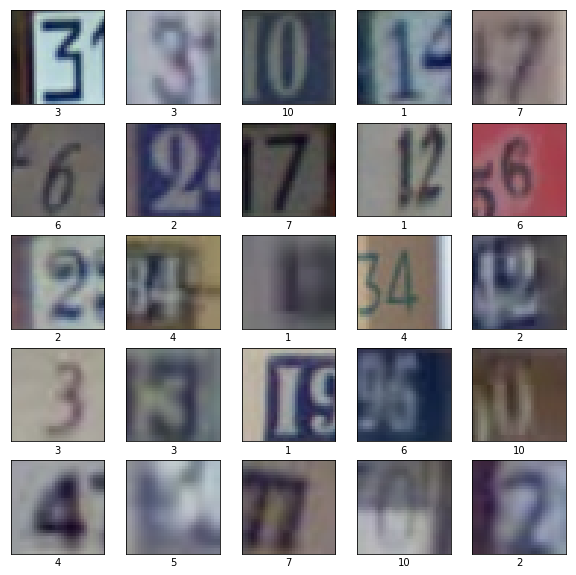

In [4]:
#Check if the validation set is divided correctely and print the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(validation_img[:,:,:,i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(validation_lbs[i][0])
plt.show()

In [92]:
#zero center


#normalize
train_img = train_img/255.0
